In [51]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [22]:
# Load dataset
train_set = pd.read_csv('stud.csv')

In [23]:
train_set.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [24]:
# Basic info
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [25]:
# Duplicate values
train_set.duplicated().sum()


0

## Feature Engineering

In [26]:
train_set.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [27]:
cat_column = train_set.select_dtypes('object').columns

In [28]:
def remove_spaces(df, column):
    df[column] = df[column].str.strip()
    return df[column]

# Apply remove spaces function
for i in cat_column:
    train_set[i] = remove_spaces(train_set, i)

In [29]:
# Assigning features to x and y
x = train_set.drop(columns='math score')
y = train_set['math score']

In [30]:
X_train, X_test, y_train, y_test =train_test_split(x, y,test_size=0.2, random_state=23)

In [31]:
cat_features = X_train.select_dtypes('object').columns
num_features = X_train.select_dtypes(exclude='object').columns

In [32]:
# Transformer 1
trnf_1 = ColumnTransformer([
    ('ohe',OneHotEncoder(drop='first',sparse_output=False, handle_unknown='ignore'), cat_features),
    ('ss', StandardScaler(), num_features)
], remainder='passthrough')

In [33]:
X_train_new = trnf_1.fit_transform(X_train)
X_test_new =trnf_1.transform(X_test)

In [34]:
X_train_new

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.177294  , -0.27995892],
       [ 1.        ,  1.        ,  0.        , ...,  1.        ,
        -1.05071641, -0.73863941],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         1.88286402,  1.8168662 ],
       ...,
       [ 1.        ,  0.        ,  1.        , ...,  1.        ,
        -0.5731568 , -0.93521676],
       [ 0.        ,  0.        ,  1.        , ...,  1.        ,
         0.99596761,  0.89950521],
       [ 0.        ,  0.        ,  1.        , ...,  0.        ,
         0.65485361,  0.24424736]])

In [35]:
# Model evaluation metrics
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [36]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_new, y_train)  # Train model
    
    # Make predictions
    y_train_pred = model.predict(X_train_new)
    y_test_pred = model.predict(X_test_new)
    
    # Evaluate train and test data metrics
    model_train_mae, model_train_mse,model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae,model_test_mse,model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print("Model performance for Training set:")
    print("Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("Mean Squared Error: {:.4f}".format(model_train_mse))
    print("Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("R2 Score {:.4f}".format(model_train_r2))
    
    print("Model performance for Test set:")
    print("Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("Mean Squared Error: {:.4f}".format(model_test_mse))
    print("Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("R2 Score {:.4f}".format(model_test_r2))
    
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set:
Mean Absolute Error: 4.1681
Mean Squared Error: 27.6593
Root Mean Squared Error: 5.2592
R2 Score 0.8815
Model performance for Test set:
Mean Absolute Error: 4.5734
Mean Squared Error: 31.6043
Root Mean Squared Error: 5.6218
R2 Score 0.8524


Lasso
Model performance for Training set:
Mean Absolute Error: 5.2005
Mean Squared Error: 42.9144
Root Mean Squared Error: 6.5509
R2 Score 0.8161
Model performance for Test set:
Mean Absolute Error: 5.1011
Mean Squared Error: 43.5252
Root Mean Squared Error: 6.5974
R2 Score 0.7967




Ridge
Model performance for Training set:
Mean Absolute Error: 4.1669
Mean Squared Error: 27.6637
Root Mean Squared Error: 5.2596
R2 Score 0.8815
Model performance for Test set:
Mean Absolute Error: 4.5673
Mean Squared Error: 31.5918
Root Mean Squared Error: 5.6207
R2 Score 0.8524


K-Neighbors Regressor
Model performance for Training set:
Mean Absolute Error: 4.5157
Mean Squared Error: 31.8401
Root Mean Squared Error: 5.6427
R2 Score 0.8636
Model performance for Test set:
Mean Absolute Error: 5.8300
Mean Squared Error: 53.6568
Root Mean Squared Error: 7.3251
R2 Score 0.7494


Decision Tree
Model performance for Training set:
Mean Absolute Error: 0.0063
Mean Squared Error: 0.0156
Root Mean Squared Error: 0.1250
R2 Score 0.9999
Model performance for Test set:
Mean Absolute Error: 7.1550
Mean Squared Error: 78.2150
Root Mean Squared Error: 8.8439
R2 Score 0.6347


Random Forest Regressor
Model performance for Training set:
Mean Absolute Error: 1.7754
Mean Squared Error: 5.1865
Root Mean 

In [37]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name','R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.852435
0,Linear Regression,0.852377
6,AdaBoost Regressor,0.802283
5,Random Forest Regressor,0.801627
1,Lasso,0.796694
3,K-Neighbors Regressor,0.749369
4,Decision Tree,0.634658


## Linear Regression

In [41]:
lin_model = LinearRegression()
lin_model.fit(X_train_new, y_train)
y_pred = lin_model.predict(X_test_new)
score = r2_score(y_test, y_pred)*100
print("Accuracy of the model is %.2f" %score,"%")

Accuracy of the model is 85.24 %


Text(0, 0.5, 'Predicted')

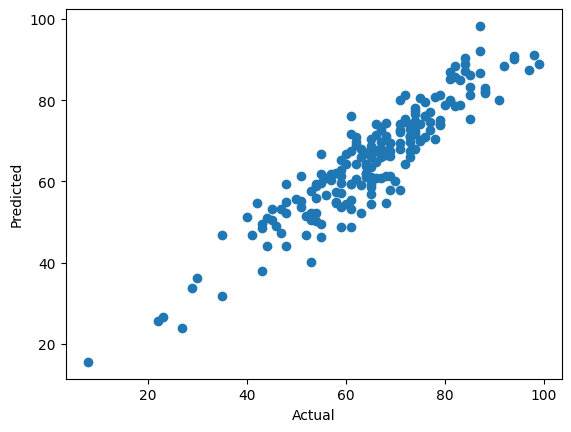

In [49]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel('Predicted')

<Axes: xlabel='math score'>

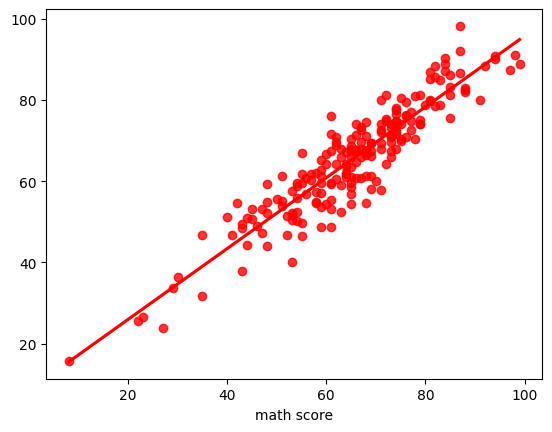

In [52]:
sns.regplot(x=y_test,y=y_pred, ci=None, color='red')

In [53]:
pred_df = pd.DataFrame({'Actual value':y_test, 'Predicted value': y_pred, 'Difference': y_test - y_pred})
pred_df

,Actual value,Predicted value,Difference
519,67,66.003977,0.996023
837,75,69.919265,5.080735
208,74,67.990259,6.009741
525,68,71.094116,-3.094116
978,55,49.586599,5.413401
...,...,...,...
647,64,61.992020,2.007980
481,52,46.828127,5.171873
134,74,73.568230,0.431770
366,69,57.981808,11.018192
